In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.optimizers import RMSprop

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def extract_mfcc(wav_file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path_to_wav_file
    #output: mfcc_features'''
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfccs


In [4]:
radvess_speech_labels = [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DATA/NEW DATA/'):
  for filename in filenames:
    #print(os.path. join(dirname, filename))
    radvess_speech_labels.append(int(filename[7:8]) - 1) # the index 7 and 8#### convert data and label to array
    wav_file_name = os.path.join(dirname, filename)
    ravdess_speech_data.append(extract_mfcc(wav_file_name)) # extract MECC features/file

print("Finish Loading the Dataset")


Finish Loading the Dataset


In [5]:
ravdess_speech_data

[array([-7.1635339e+02,  3.5547619e+01, -6.0226822e+00,  7.9422688e+00,
        -6.1502590e+00, -6.9712567e+00, -7.0630217e+00, -1.1555155e+01,
        -4.8777719e+00, -4.6736693e+00, -2.1677942e+00, -6.6348276e+00,
        -4.3071809e+00, -2.3838346e+00, -6.3300233e+00, -5.2437921e+00,
        -4.1624079e+00, -3.1248124e+00, -4.1112938e+00, -3.4004228e+00,
        -3.5823438e+00, -1.8261735e+00, -3.1796792e+00,  2.1374850e+00,
         7.9927707e-01,  1.5574312e+00,  8.1499970e-01,  4.0056100e-01,
        -3.5249951e-01,  1.6734822e+00,  1.6530992e+00,  3.3280256e+00,
         1.6256377e+00,  2.6842797e+00,  1.8317868e+00,  3.7657292e+00,
         1.6044767e+00,  1.8759145e+00, -1.8490535e+00, -4.9551505e-01],
       dtype=float32),
 array([-7.97798645e+02,  3.24469261e+01, -6.71399069e+00,  6.68423796e+00,
        -4.76931095e+00, -5.83923006e+00, -9.00645542e+00, -1.09791718e+01,
        -6.62882328e+00, -4.44731379e+00, -5.28142023e+00, -9.05753994e+00,
        -4.23637152e+00, -1.

In [6]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions

#### make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
labels_categorical.shape


(2890, 8)

In [7]:
ravdess_speech_data_array

array([[-7.1635339e+02,  3.5547619e+01, -6.0226822e+00, ...,
         1.8759145e+00, -1.8490535e+00, -4.9551505e-01],
       [-7.9779865e+02,  3.2446926e+01, -6.7139907e+00, ...,
         3.6691058e+00, -1.9875361e-01,  1.0295441e+00],
       [-8.1440356e+02,  3.5418686e+01,  3.5164969e+00, ...,
         3.9128282e+00, -9.1779530e-01,  9.8145950e-01],
       ...,
       [-6.2067432e+02,  8.2283218e+01,  1.1684595e+01, ...,
         3.2298002e-01, -1.5905273e-01,  2.2935662e+00],
       [-6.1457819e+02,  5.9530006e+01,  5.0313540e+00, ...,
         1.4355898e+00,  5.4185890e-02,  3.6620228e+00],
       [-6.0365424e+02,  3.9900253e+01,  8.9364252e+00, ...,
         1.5293467e+00,  1.7000102e+00,  2.6680214e+00]], dtype=float32)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(np.array(ravdess_speech_data_array),labels_categorical,test_size=0.20,random_state=9)

In [9]:
 # split the training, validating, and testing sets
 number_of_samples = ravdess_speech_data_array.shape[0]
 training_samples = int(number_of_samples * 0.8)
 validation_samples = int(number_of_samples * 0.1)
 test_samples = int(number_of_samples * 0.1)

In [10]:
def create_model_LSTM():
  model=Sequential()
  model.add(LSTM(128,return_sequences=False,input_shape=(40,1)))
  model.add(Dense(64))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
  return model


In [11]:
w=np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [12]:
w.shape

(2312, 40, 1)

In [13]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1),labels_categorical[:training_samples],validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples],-1),labels_categorical[training_samples:training_samples+validation_samples]),epochs=130,shuffle=True)

Epoch 1/130
73/73 [==============================] - 9s 73ms/step - loss: 2.0585 - accuracy: 0.1661 - val_loss: 1.9730 - val_accuracy: 0.2076
Epoch 2/130
73/73 [==============================] - 6s 77ms/step - loss: 1.9969 - accuracy: 0.1951 - val_loss: 1.9138 - val_accuracy: 0.2907
Epoch 3/130
73/73 [==============================] - 7s 91ms/step - loss: 1.9546 - accuracy: 0.2340 - val_loss: 1.8949 - val_accuracy: 0.2595
Epoch 4/130
73/73 [==============================] - 4s 50ms/step - loss: 1.9314 - accuracy: 0.2310 - val_loss: 1.8764 - val_accuracy: 0.2734
Epoch 5/130
73/73 [==============================] - 3s 47ms/step - loss: 1.9036 - accuracy: 0.2452 - val_loss: 1.8547 - val_accuracy: 0.3114
Epoch 6/130
73/73 [==============================] - 4s 58ms/step - loss: 1.8830 - accuracy: 0.2634 - val_loss: 1.8112 - val_accuracy: 0.3114
Epoch 7/130
73/73 [==============================] - 6s 78ms/step - loss: 1.8604 - accuracy: 0.2794 - val_loss: 1.7899 - val_accuracy: 0.3114
Epoch 

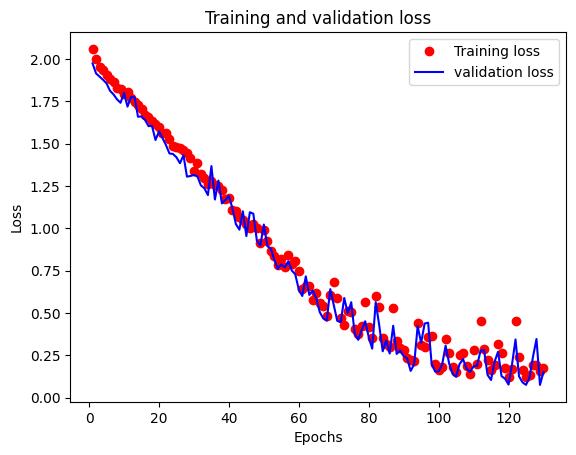

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot (epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel ('Epochs')
plt.ylabel ('Loss')
plt.legend()
plt. show()

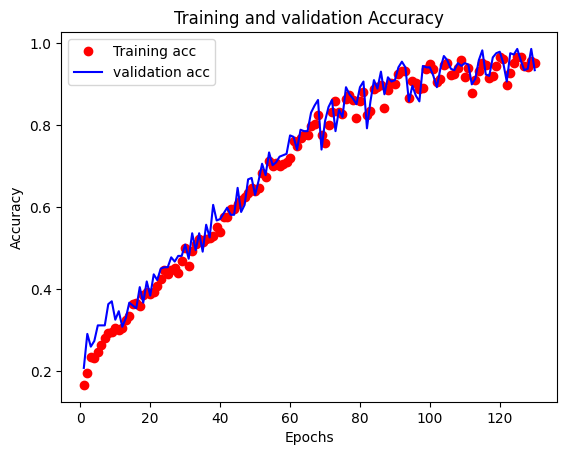

In [15]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot (epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel ('Epochs')
plt.ylabel ('Accuracy')
plt.legend()
plt. show()

In [16]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:],-1),labels_categorical[training_samples+validation_samples:])

10/10 [==============================] - 0s 17ms/step - loss: 0.1549 - accuracy: 0.9446


[0.15492606163024902, 0.9446367025375366]

In [17]:
emotions={1: 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [18]:
predict('/content/drive/MyDrive/DATA/NEW DATA/Actor_02/03-01-01-01-01-01-02.wav')

1/1 [==============================] - 1s 506ms/step
neutral


In [19]:
predict('/content/drive/MyDrive/DATA/NEW DATA/Actor_02/03-01-08-01-01-01-02.wav')

1/1 [==============================] - 0s 42ms/step
surprised


In [20]:
predict('/content/drive/MyDrive/DATA/NEW DATA/Actor_02/03-01-03-01-01-01-02.wav')

1/1 [==============================] - 0s 37ms/step
happy


In [21]:
model_A.save('mymodel.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
import tensorflow as tf

In [24]:
modelc=tf.keras.models.load_model('mymodel.h5')
